In [2]:
# read cleaned results
import pandas as pd
from pathlib import Path
import pdb, os, sys
root_dir = os.path.dirname(os.getcwd())
sys.path.append(root_dir)

agg_df_with_default = pd.read_csv(Path("./cleaned_results/tuned_aggregated_results_with_default.csv"))
agg_df = pd.read_csv(Path("./cleaned_results/tuned_aggregated_results.csv"))

fold_df_with_default = pd.read_csv(Path("./cleaned_results/tuned_fold_results_with_default.csv"))
fold_df = pd.read_csv(Path("./cleaned_results/tuned_fold_results.csv"))

# make sure output folder exists
output_folder = Path("./performance_rankings")
output_folder.mkdir(exist_ok=True)  

In [3]:
table_idx = 4
method = 'Ours'
top_n = 3
metric = "AUC"

In [4]:
top_algorithms = agg_df.groupby('dataset_name').apply(
    lambda x: x.nlargest(top_n, f'{metric}__test_mean')[['alg_name', f'{metric}__test_mean']]
)

# Reshape the data to have top-1, top-2, and top-3 algorithms as columns
result_dict = {'dataset_name': top_algorithms.index.get_level_values(0).unique()}

for i in range(1, top_n + 1):
    result_dict[f'top_{i}_algorithm'] = top_algorithms.groupby(level=0).nth(i-1)['alg_name'].values

result_table = pd.DataFrame(result_dict)

# Display the result table
result_table

if table_idx == 1:
    from analysis.table1 import DATASETS
elif table_idx == 2:
    from analysis.table2 import DATASETS
elif table_idx == 4:
    from analysis.table4 import DATASETS
    
final_table = []

for idx, row in result_table.iterrows():
    dataset_name = row['dataset_name']
    if dataset_name in DATASETS:    
        final_table.append(row)
    
final_table = pd.concat(final_table, axis=1).T
# count the number of our method in the top 5 algorithms 

num_ours = 0
for idx, row in final_table.iterrows():
    for i in range(1, top_n + 1):
        if method in row[f'top_{i}_algorithm']:
            num_ours += 1
            break
print(f"Number of our method in the top 5 algorithms: {num_ours} out of {len(final_table)} datasets")

Number of our method in the top 5 algorithms: 8 out of 36 datasets


/tmp/ipykernel_2979853/2594518835.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_algorithms = agg_df.groupby('dataset_name').apply(


In [5]:
# Save the result table to a CSV file
result_table.to_csv(output_folder / 'top_3_algorithms_per_dataset.csv', index=False)
print(f"Results saved to {output_folder / 'top_3_algorithms_per_dataset.csv'}")

Results saved to performance_rankings/top_3_algorithms_per_dataset.csv


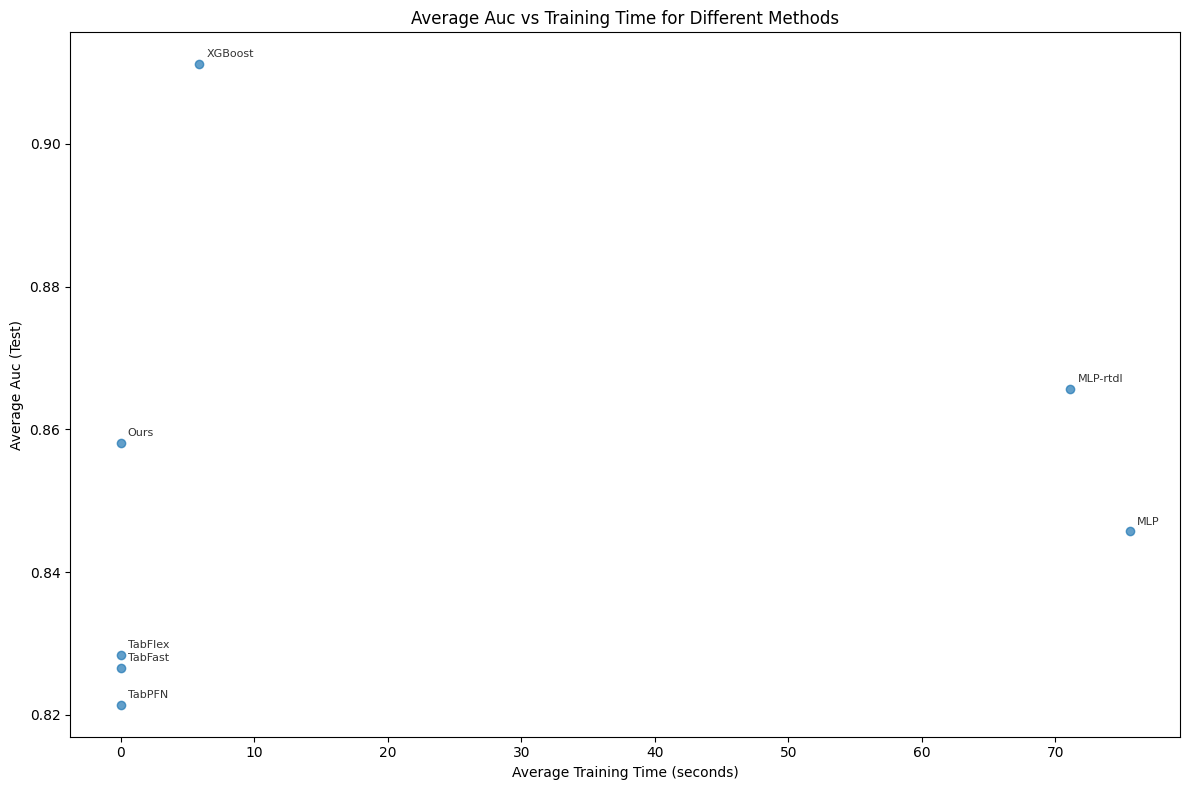

Scatter plot saved to performance_rankings/avg_AUC_vs_time_scatter.png


<Figure size 640x480 with 0 Axes>

In [20]:
new_agg_df = []
for idx, row in agg_df.iterrows():
    dataset_name = row['dataset_name']
    if dataset_name in DATASETS:    
        new_agg_df.append(row)

new_agg_df = pd.concat(new_agg_df, axis=1).T

# Filter methods that have valid results for all datasets
valid_methods = new_agg_df.groupby('alg_name').filter(lambda x: len(x) == len(new_agg_df['dataset_name'].unique()))

# Calculate average time and performance for each method
avg_metrics = valid_methods.groupby('alg_name').agg({
    'training_time_mean': 'mean',
    f'{metric}__test_mean': 'mean'
}).reset_index()

# Create scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(avg_metrics['training_time_mean'], 
                      avg_metrics[f'{metric}__test_mean'],
                      alpha=0.7)

# Add labels and title
plt.xlabel('Average Training Time (seconds)')
plt.ylabel(f'Average {metric.capitalize()} (Test)')
plt.title(f'Average {metric.capitalize()} vs Training Time for Different Methods')

# Add method names as annotations
for i, txt in enumerate(avg_metrics['alg_name']):
    plt.annotate(txt, (avg_metrics['training_time_mean'].iloc[i], avg_metrics[f'{metric}__test_mean'].iloc[i]),
                 xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.8)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Save the plot
plt.savefig(output_folder / f'avg_{metric}_vs_time_scatter.png', dpi=300, bbox_inches='tight')
print(f"Scatter plot saved to {output_folder / f'avg_{metric}_vs_time_scatter.png'}")


In [14]:
# Get all unique dataset names
all_datasets = set(agg_df['dataset_name'].unique())

# Check for missing datasets for 'Ours' and 'XGBoost'
methods_to_check = ['Ours', 'XGBoost']

for method in methods_to_check:
    method_datasets = set(agg_df[agg_df['alg_name'] == method]['dataset_name'])
    missing_datasets = all_datasets - method_datasets
    
    print(f"Method: {method}")
    print(f"Number of datasets: {len(method_datasets)}")
    print(f"Missing datasets: {missing_datasets}")
    print(f"Number of missing datasets: {len(missing_datasets)}")
    print()

# Print the number of valid methods
valid_methods = agg_df.groupby('alg_name').filter(lambda x: len(x) == len(all_datasets))
print(f"Number of valid methods: {len(valid_methods['alg_name'].unique())}")
print("Valid methods:")
print(valid_methods['alg_name'].unique())

Method: Ours
Number of datasets: 115
Missing datasets: {'openml__nursery__9892', 'openml__primary-tumor__146032', 'openml__chess__3952', 'openml__Census-Income__168340', 'openml__vowel__3022', 'openml__first-order-theorem-proving__9985', 'openml__climate-model-simulation-crashes__146819', 'openml__connect-4__146195', 'openml__pendigits__32', 'openml__philippine__190410', 'openml__riccardo__168338', 'openml__hepatitis__54', 'openml__collins__3567', 'openml__MagicTelescope__3954', 'openml__letter__6', 'openml__soybean__41', 'openml__mfeat-pixel__146824', 'openml__magic__146206', 'openml__bank-marketing__9899', 'openml__segment__146822', 'openml__gas-drift__9986', 'openml__eye_movements__3897', 'openml__har__14970', 'openml__jannis__168330', 'openml__isolet__3481', 'openml__APSFailure__168868', 'openml__mnist_784__3573', 'openml__covertype__7593', 'openml__CIFAR_10__167124', 'openml__house_16H__3686', 'openml__robert__168332', 'openml__Amazon_employee_access__34539', 'openml__numerai28.6_